<a href="https://colab.research.google.com/github/willystw/fastai-learning/blob/mnist-identification/Number_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialization

The application uses fastai & pytorch library

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 7.9 MB/s 
     |████████████████████████████████| 46 kB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 51.1 MB/s 
     |████████████████████████████████| 188 kB 60.7 MB/s 
     |████████████████████████████████| 56 kB 5.2 MB/s 
     |████████████████████████████████| 51 kB 418 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

### Download Raw Data

Raw data used here is from fastai course, because the data is in image format, and the image size is identical.

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [6]:
(path/'training').ls()

(#10) [Path('training/5'),Path('training/3'),Path('training/2'),Path('training/0'),Path('training/4'),Path('training/8'),Path('training/6'),Path('training/9'),Path('training/1'),Path('training/7')]

In [7]:
(path/'testing').ls()

(#10) [Path('testing/5'),Path('testing/3'),Path('testing/2'),Path('testing/0'),Path('testing/4'),Path('testing/8'),Path('testing/6'),Path('testing/9'),Path('testing/1'),Path('testing/7')]

In [8]:
fours = (path/'training/4').ls().sorted()

In [9]:
len(fours)

5842

In [10]:
Image.open(fours[542])

## Init Variables

Store images data to a variable, then convert it to a tensor array.

In [11]:
zeros = (path/'training/0').ls().sorted()
ones = (path/'training/1').ls().sorted()
twos = (path/'training/2').ls().sorted()
threes = (path/'training/3').ls().sorted()
fours = (path/'training/4').ls().sorted()
fives = (path/'training/5').ls().sorted()
sixes = (path/'training/6').ls().sorted()
sevens = (path/'training/7').ls().sorted()
eights = (path/'training/8').ls().sorted()
nines = (path/'training/9').ls().sorted()

In [12]:
zero_tensor = [tensor(Image.open(o)) for o in zeros]
one_tensor = [tensor(Image.open(o)) for o in ones]
two_tensor = [tensor(Image.open(o)) for o in twos]
three_tensor = [tensor(Image.open(o)) for o in threes]
four_tensor = [tensor(Image.open(o)) for o in fours]
five_tensor = [tensor(Image.open(o)) for o in fives]
six_tensor = [tensor(Image.open(o)) for o in sixes]
seven_tensor = [tensor(Image.open(o)) for o in sevens]
eight_tensor = [tensor(Image.open(o)) for o in eights]
nine_tensor = [tensor(Image.open(o)) for o in nines]

## Using Pixel Similarity Method

In this method, get average pixel value of a number. Then, calculate similarity with each number to determine which number is closest to prediction.

In [13]:
zero_stack = torch.stack(zero_tensor).float()/255
one_stack = torch.stack(one_tensor).float()/255
two_stack = torch.stack(two_tensor).float()/255
three_stack = torch.stack(three_tensor).float()/255
four_stack = torch.stack(four_tensor).float()/255
five_stack = torch.stack(five_tensor).float()/255
six_stack = torch.stack(six_tensor).float()/255
seven_stack = torch.stack(seven_tensor).float()/255
eight_stack = torch.stack(eight_tensor).float()/255
nine_stack = torch.stack(nine_tensor).float()/255

In [14]:
mean0 = zero_stack.mean(0)
mean1 = one_stack.mean(0)
mean2 = two_stack.mean(0)
mean3 = three_stack.mean(0)
mean4 = four_stack.mean(0)
mean5 = five_stack.mean(0)
mean6 = six_stack.mean(0)
mean7 = seven_stack.mean(0)
mean8 = eight_stack.mean(0)
mean9 = nine_stack.mean(0)

means = [zero_stack.mean(0), one_stack.mean(0), two_stack.mean(0), three_stack.mean(0), four_stack.mean(0), 
         five_stack.mean(0), six_stack.mean(0), seven_stack.mean(0), eight_stack.mean(0), nine_stack.mean(0)]


Define distance function

In [15]:
def distance(a,b) : return (a-b).abs().mean((-1,-2))

Use test data to get the function accuracy

In [16]:
zero_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/0').ls().sorted()])
one_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/1').ls().sorted()])
two_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/2').ls().sorted()])
three_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/3').ls().sorted()])
four_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/4').ls().sorted()])
five_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/5').ls().sorted()])
six_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/6').ls().sorted()])
seven_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/7').ls().sorted()])
eight_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/8').ls().sorted()])
nine_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/9').ls().sorted()])

t_tensors = [zero_t_tensor, one_t_tensor, two_t_tensor, three_t_tensor, four_t_tensor, 
            five_t_tensor, six_t_tensor, seven_t_tensor, eight_t_tensor, nine_t_tensor]

In [17]:
def get_accuracy(tensor_input, predicted_num):
    #init with true elements
    result = torch.ones(len(tensor_input), dtype=torch.bool)
    #get distance between input and predicted number's mean
    base = distance(tensor_input, means[predicted_num])
    #iterate 9 times to compare distance between input tensor and other available numbers.
    #skip if i is predicted_num
    #use logical and to accummulate the result
    for i in range(0,10):
        if i == predicted_num:
            continue
        d = distance(tensor_input, means[i])
        acc = base < d
        result = torch.logical_and(result, acc)
    return result


def get_accuracy_list(predicted_num):
    """Combine multiple get_accuracy functions into one function.
    Take data from t_tensors and iterate it.
    If the index of iteration is the same as predicted_num, use get_accuracy.
    Otherwise, use 1-get_accuracy to predict the chance of not predicted_num.
    Index 0 of the result is the correctness of test data compared with its predicted_num 
    """
    result = [get_accuracy(t_tensors[predicted_num], predicted_num).float().mean()]
    for i in range(0, 10):
        if i == predicted_num:
            continue
        pred = get_accuracy(t_tensors[i], predicted_num).float().mean()
        result.append((1 - pred))    
    return result

In [18]:
for i in range(0,10):
    r = get_accuracy_list(i)
    print(f"Accuracy of number {i} is {r} with mean {torch.mean(torch.stack(r))}")


Accuracy of number 0 is [tensor(0.9133), tensor(1.), tensor(0.9641), tensor(0.9911), tensor(1.), tensor(0.9630), tensor(0.9760), tensor(0.9981), tensor(0.9805), tensor(0.9841)] with mean 0.9770188331604004
Accuracy of number 1 is [tensor(0.9965), tensor(0.9898), tensor(0.7103), tensor(0.8584), tensor(0.9043), tensor(0.7231), tensor(0.9134), tensor(0.8531), tensor(0.8255), tensor(0.9286)] with mean 0.8702907562255859
Accuracy of number 2 is [tensor(0.5145), tensor(1.), tensor(1.), tensor(0.9931), tensor(1.), tensor(1.), tensor(0.9948), tensor(0.9942), tensor(1.), tensor(0.9970)] with mean 0.9493575096130371
Accuracy of number 3 is [tensor(0.7406), tensor(0.9939), tensor(0.9982), tensor(0.9719), tensor(1.), tensor(0.7365), tensor(0.9990), tensor(1.), tensor(0.9405), tensor(0.9931)] with mean 0.937362551689148
Accuracy of number 4 is [tensor(0.6538), tensor(0.9969), tensor(1.), tensor(0.9845), tensor(0.9990), tensor(0.9854), tensor(0.9729), tensor(0.9932), tensor(0.9959), tensor(0.9683)] 

## Conclusion of Using Pixel Similarity Method

Most of the test result performs well, with mean > 0.90, although there are some concerns. Some test data does not perform well if tested with the correct number. For example, test 5 only has 0.2276 in confidence that the number tested is 5. For further improvement, test with other methods (e.g Stochastic Gradient Descent /SGD) to get better accuracy

## Using Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a method to optimize objective function with suitable smoothness properties iteratively. The difference between SGD and gradient descent is that SGD uses mini-batch instead of processing all inputs at once, which makes SGD faster and cost efficient.


There are seven steps when trying to identify number using SGD:

1. Initialize weight with random value
1. Predict the number
1. Calculate the model loss (how far the prediction from actual result)
1. Calculate gradient, to measure new weight
1. Step(change) all the weight based on calculation
1. Go back to step 2, and repeat
1. Iterate until you decide to stop 

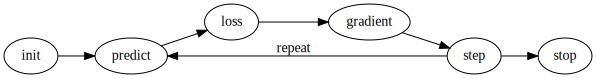

In [ ]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

### Loss Function
To calculate loss, I use sigmoid function to make sure the loss is betweeen 0 and 1

In [114]:
def mnist_loss(prediction, target):
  prediction = prediction.sigmoid()
  return torch.where(target == 1, 1-prediction, prediction).mean()

The code above can be described as: return 1 - prediction is target is 1, else return prediction

### Mini-Batch
To split data into several batches, I use `DataLoader` class to load data, randomize the entry, and split the data into several batches.

In [20]:
train_x = torch.cat([zero_stack, one_stack,  two_stack, three_stack, four_stack, five_stack, six_stack, seven_stack, eight_stack, nine_stack]).view(-1, 28*28)
train_y = tensor([0.1]* len(zeros) + [0.2]* len(ones) + [0.3]* len(twos) + [0.4]* len(threes) + [0.5]* len(fours) + [0.6]* len(fives) + 
                 [0.7]* len(sixes) + [0.8]* len(sevens) + [0.9]* len(eights) + [1]* len(nines)).unsqueeze(1)
train_dset = list(zip(train_x, train_y))

In [21]:
validation_x = torch.cat([zero_t_tensor, one_t_tensor, two_t_tensor, three_t_tensor, four_t_tensor, five_t_tensor, 
                     six_t_tensor, seven_t_tensor, eight_t_tensor, nine_t_tensor]).view(-1, 28*28)
validation_y = tensor([0.1]* len(zero_t_tensor) + [0.2]* len(one_t_tensor) + [0.3]* len(two_t_tensor) + [0.4]* len(three_t_tensor) + [4]* len(four_t_tensor) + [5]* len(five_t_tensor) + 
                 [6]* len(six_t_tensor) + [7]* len(seven_t_tensor) + [8]* len(eight_t_tensor) + [9]* len(nine_t_tensor)).unsqueeze(1)
validation_dset = list(zip(validation_x, validation_y))

In the code above, I map the X axis with image tensors, and Y axis with numbering label to create a dataset. I do this process for both training data and validation data.

In [22]:
train_dl = DataLoader(train_dset, batch_size=256)
validation_dl = DataLoader(validation_dset, batch_size=256)


In [104]:
def calculate_gradient(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

def validate_epoch(model):
  accs = [batch_accuracy(model(xb.float()), yb) for xb, yb in validation_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [107]:
def train_epoch(model):
  for xb, yb in train_dl:
    calculate_gradient(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [105]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [113]:
linear_model = nn.Linear(28 * 28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

tensor([[ 0.0435],
        [ 0.2823],
        [-0.1126],
        [-0.0674],
        [ 0.0819],
        [-0.0936],
        [ 0.0426],
        [ 0.0440],
        [-0.0564],
        [ 0.0919],
        [ 0.0154],
        [ 0.0427],
        [-0.0572],
        [ 0.0635],
        [-0.1191],
        [ 0.1100],
        [ 0.0098],
        [ 0.1264],
        [ 0.2413],
        [ 0.1999],
        [ 0.0887],
        [ 0.2988],
        [-0.0176],
        [-0.0863],
        [-0.0816],
        [-0.0759],
        [-0.2002],
        [ 0.1510],
        [-0.2674],
        [-0.1687],
        [ 0.0730],
        [ 0.0862],
        [-0.1505],
        [-0.0447],
        [-0.2325],
        [-0.1254],
        [-0.2222],
        [ 0.1827],
        [-0.0456],
        [-0.0346],
        [-0.1208],
        [ 0.0768],
        [ 0.0526],
        [ 0.1097],
        [ 0.1243],
        [-0.0635],
        [ 0.1433],
        [-0.1883],
        [ 0.0273],
        [ 0.1985],
        [ 0.2015],
        [-0.1280],
        [-0.

AttributeError: ignored